<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#March-2020-Puzzle" data-toc-modified-id="March-2020-Puzzle-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>March 2020 Puzzle</a></span></li><li><span><a href="#Analytical-Probability" data-toc-modified-id="Analytical-Probability-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analytical Probability</a></span><ul class="toc-item"><li><span><a href="#Simulation-Verification" data-toc-modified-id="Simulation-Verification-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simulation Verification</a></span></li></ul></li></ul></div>

## March 2020 Puzzle

A random line segment of length D is chosen on a plane marked with an infinite checkerboard grid (i.e., a unit side length square grid).  What length D maximizes the probability that the segment crosses exactly one line on the checkerboard grid, and what is this maximal probability? 

## Analytical Probability

We ansatz that the line segment of length 1 is optimal.

Then, the probablity that the stick __DOESN'T__ intersect exactly one grid point is

\begin{equation}
4\int_{0}^{1/2}
\int_{0}^{1/2}
\frac{
\sum2 \left(
cos^{-1}\left(x\right) + cos^{-1}\left(y\right)\right)
 - \pi}{2\pi}
dx 
dy
\end{equation}

### Simulation Verification

In [52]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [86]:
def simulate_prob(D, num_trials=100000):
    initial_coords = np.random.random((num_trials, 2)) * 0.5
    random_angles = np.random.random((num_trials, 1)) * 2 * np.pi
    deltas = np.hstack([D * np.cos(random_angles), D * np.sin(random_angles)])
    end_coords = initial_coords + deltas
    # This should return the number of times we intersect the graph paper
    # intersections = np.abs(np.floor(end_coords) - np.floor(initial_coords)).sum(axis=1)
    intersections = (end_coords > 1.0).sum(axis=1) + (end_coords < 0.0).sum(axis=1)
    return (intersections == 1).mean()

In [87]:
probs = []
for distance in tqdm(np.linspace(0, 2, 10001)):
    probs.append(simulate_prob(distance))
probs = np.array(probs)

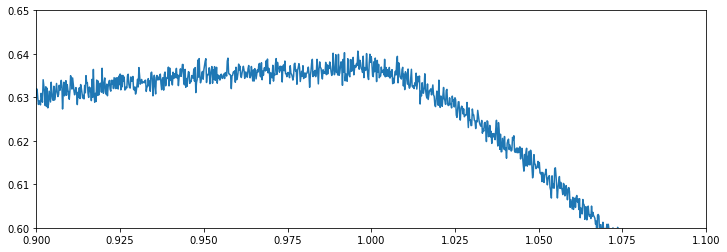

In [85]:
plt.figure(figsize=(12, 4))
plt.plot(list(np.linspace(0, 2, 10001)), probs)
plt.xlim(0.90, 1.10)
plt.ylim(0.6, 0.65)
plt.show()

In [88]:
probs.max()

0.63963

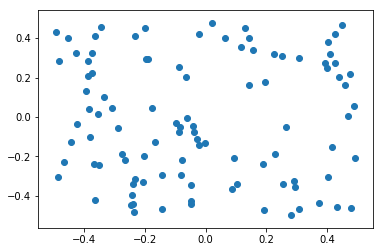

In [12]:
plt.scatter(*zip(*initial_coords))